In [1]:
def r2_rmse_vals( Y_true, Y_pred, label ) :
    # (ypred-ytrue) squared numeratore
    diff_numeratore = []
    for idx, v in enumerate ( Y_pred ):
        diff_nu = v-Y_true[idx]
        diff_numeratore.append( diff_nu )
    diff_numeratore_SQUARED = []
    for v in diff_numeratore :
        v = v**2
        diff_numeratore_SQUARED.append( v )
    # numero elememti y_true ( per fare la media )
    num_elementi = 0
    for v in Y_true :
        num_elementi = num_elementi + 1
    # sommatoria elememti media 
    somma = 0
    for v in Y_true :
        somma = somma + v
    media = somma/num_elementi
    # sopra ho calcolato la media ( vedi denominatore )
    # sommatoria diff denominatore squared 
    diff_denominatore = []
    for idx, v in enumerate ( Y_true ):
        diff_de = v-media 
        diff_denominatore.append( diff_de )
    diff_denominatore_SQUARED = []
    for v in diff_denominatore :
        v = v**2
        diff_denominatore_SQUARED.append( v )
    sommatoria_numeratore = 0
    for v in diff_numeratore_SQUARED :
        sommatoria_numeratore = sommatoria_numeratore+v
    sommatoria_denominatore = 0
    for v in diff_denominatore_SQUARED :
        sommatoria_denominatore = sommatoria_denominatore+v
    # r2_val 
    r2 = 1-(sommatoria_numeratore/sommatoria_denominatore)
    print("r2 su",label,"set è :", r2 )
    # y_true-y_pred SQUARED 
    diff_rmse_numeratore = []
    for idx, v in enumerate ( Y_true ) :
        diff_rmse_numeratore.append( v-Y_pred[idx] )
    diff_rmse_numeratore_SQUARED = []
    for v in diff_rmse_numeratore :
        v = v**2
        diff_rmse_numeratore_SQUARED.append( v )
    sommatoria_diff_rmse = 0
    for v in diff_rmse_numeratore_SQUARED :
        sommatoria_diff_rmse = sommatoria_diff_rmse+v
    # RMSE
    rmse = (sommatoria_diff_rmse/num_elementi)**0.5
    print("rmse su",label,"set è :", rmse )   

In [2]:
# il file MOE_GRID_1078_SCALED_MOE.csv lo ho ottenuto a partire dal file base MOE_GRID_1078.xlsx( vedere inizio foglio descriptors_MOE_SCALED_GRID_NOT_SCALED_scale_false )
import pandas as pd
file = './data/MOE_GRID_1078_SCALED_MOE.csv'
file_read = pd.read_csv(file)
file_dataframe = pd.DataFrame(file_read)
file_dataframe

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,UNIQUEID,SMILE,SETID,LOGD,mol,GRID_DESCRIPTOR,0,...,SlogP_VSA3,SlogP_VSA4,SlogP_VSA8,SMR_VSA1,SMR_VSA6,TPSA,vsa_acc,vsa_other,vsa_pol,weinerPol
0,0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,1 0 0 0 0 0 0 0 ...,1.729811,...,1.274734,1.126473,0.109594,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.242571
1,1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,1 0 0 0 0 0 0 0 ...,0.224985,...,0.248713,-0.691608,-0.632522,-1.013442,0.273703,-0.366801,0.536315,-0.700811,-0.211249,-0.207889
2,2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,1 0 0 0 0 0 0 0 ...,0.751230,...,0.469541,-0.934320,-0.261464,-0.191134,0.028732,-0.338885,-0.526052,-0.942893,-0.101940,-1.165116
3,3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,1 0 0 0 0 0 0 0 ...,2.234495,...,1.274734,1.369185,-0.632522,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.693031
4,4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,1 0 0 0 0 0 0 0 ...,1.050557,...,0.411323,-0.934320,-0.261464,-1.065763,0.094885,-0.117799,0.255160,-0.344628,0.104998,-0.939886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,1 0 0 0 0 0 0 0 ...,-1.447175,...,-0.124774,-0.691608,-0.632522,0.080212,-0.106998,-0.819441,-1.163093,-1.333675,-0.791938,-0.996194
1074,1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,1 0 0 0 0 0 0 0 ...,-0.576575,...,1.170341,-0.934320,0.109594,0.848887,1.338626,0.714700,0.560892,0.506076,0.243471,0.467801
1075,1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1.415,O=C1Oc2c(cccc2)C=C1,1 0 0 0 0 0 0 0 ...,0.428894,...,-1.046402,-0.691608,-0.285559,-0.794416,-0.440550,-1.198053,-0.526052,-0.538473,-1.090054,-1.390346
1076,1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,1 0 0 0 0 0 0 0 ...,-0.740039,...,-1.046402,-0.691608,-0.632522,-0.025187,-1.001106,0.059668,-0.222298,0.328642,0.394279,-1.221424


In [3]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]
                
basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_read["UNIQUEID"]):
    
    fdesc = file_read[file_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_read[file_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_read[file_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_read[file_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)


[0.21791715 0.1120733  0.07017583 0.05948068 0.04559008 0.03779031
 0.0333575  0.0272078  0.02128133 0.02119042 0.01913998 0.01596359
 0.01447954 0.01396863 0.01283914 0.01176048 0.01137346 0.01070085
 0.01000079 0.00895763 0.00814463 0.00735478 0.0068488  0.0063962
 0.00568802 0.00563717 0.00544741 0.00485086 0.00471759 0.00448248
 0.00438164 0.00432047 0.00421384 0.00395037 0.00362344 0.00355869
 0.00331049 0.00307111 0.00295473 0.00276874 0.00273678 0.00263654
 0.00255512 0.00250755 0.00239495 0.00223195 0.00212812 0.0020975
 0.00200401 0.00197412 0.00189612 0.00185496 0.00175345 0.00173659
 0.00167063]


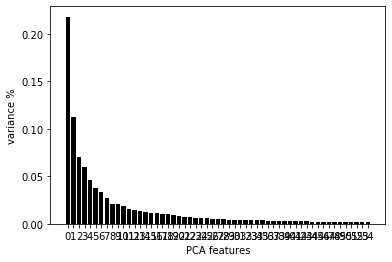

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=55)
principalComponents = pca.fit_transform(X["GM"])
print(pca.explained_variance_ratio_)

# Plot the explained variances
features = range(pca.n_components_)
explained_variance = pca.explained_variance_ratio_
plt.bar(features, explained_variance, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

plt.show()

In [5]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.385628,-3.797450,-0.205515,0.577468,2.650235,2.107584,-0.507962,-1.988272,-0.272682,1.292063,...,0.138501,0.232391,0.127910,-0.011958,-0.286023,-0.150657,0.775789,0.162900,-0.011237,-0.232789
1,-1.852267,-0.967470,1.521799,-2.190522,1.602440,-1.351195,-0.842831,-2.400753,2.772700,-0.622955,...,0.159716,0.147472,-0.297030,-0.335714,0.563237,-0.076800,-0.212084,-0.502522,0.089546,-0.321675
2,-3.337043,-3.978068,0.821395,-1.131030,-0.451054,1.285466,1.379637,-0.724121,-0.555809,1.270822,...,-0.026343,0.157674,0.074638,0.182128,0.065293,0.154562,-0.090596,0.005433,-0.088326,-0.240883
3,-0.253895,-0.667602,0.210576,1.674015,2.559883,3.029479,0.154352,-1.241352,0.541401,0.903706,...,0.127633,0.128228,0.128625,0.306921,-0.475219,-0.207641,0.551149,-0.053458,0.218002,-0.284417
4,-1.922622,-4.428363,1.265089,0.316525,-0.389950,1.273411,2.171385,-1.398246,-0.092055,0.865351,...,-0.196532,-0.046454,0.045364,0.040956,-0.001114,-0.165943,0.115191,0.179392,-0.404366,-0.024200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,-2.148289,-0.223120,-0.461049,-2.137237,-1.346175,0.538462,1.127670,1.086609,0.661684,0.514355,...,0.109741,-0.201818,-0.390746,0.101119,-0.336013,0.092603,-0.456061,0.916882,0.279442,0.150470
1074,1.624281,-3.297367,1.289536,-1.760202,2.810553,1.727617,-2.237323,-1.001370,-1.300991,-0.158205,...,0.212984,-0.344376,-0.141702,-0.569492,0.020915,-0.000725,-0.209854,0.286916,-0.584170,0.126403
1075,-4.973996,-1.083797,-0.892020,0.877158,-0.985322,0.842784,-0.448580,0.093925,0.040904,-0.102417,...,0.032077,-0.098992,-0.001507,-0.029487,0.247412,-0.118305,0.004306,0.177483,0.006777,-0.144513
1076,-3.509222,-1.279654,0.934532,0.395040,-1.104419,-0.579890,-0.543524,0.658254,-1.447212,-0.528566,...,-0.279867,0.356175,0.280244,0.030397,-0.376158,-0.086786,-0.494257,0.003420,0.476556,0.448737


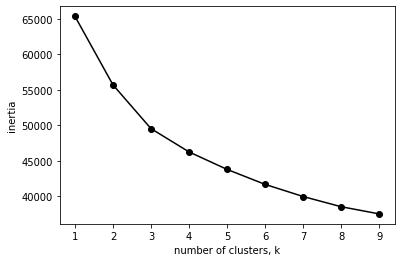

In [6]:
from sklearn.cluster import KMeans



ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:53])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [7]:
import numpy as np

# Using three clusters 
NC = 3

model = KMeans(n_clusters=NC)
   
X_01 = PCA_components.iloc[:,:53].values

y_km = model.fit(X_01)

clusters = {}
for idx , l in enumerate(y_km.labels_):
    if l in clusters:
        clusters[l].append(X_01[idx])
    else:
        clusters[l] = []
        clusters[l].append(X_01[idx])
        
        
c1 = np.asarray(clusters[0])

c2 = np.asarray(clusters[1])


c3 = np.asarray(clusters[2])

In [8]:
print(len(c1))
print(len(c2))
print(len(c3))

711
324
43


In [9]:
for idx , l in enumerate(y_km.labels_):
    print( idx, l )

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 1
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 2
83 0
84 0
85 1
86 0
87 1
88 1
89 1
90 0
91 0
92 0
93 1
94 0
95 1
96 1
97 0
98 0
99 1
100 0
101 1
102 1
103 0
104 0
105 1
106 1
107 0
108 1
109 1
110 0
111 0
112 0
113 1
114 1
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 1
125 0
126 0
127 1
128 0
129 0
130 0
131 0
132 0
133 1
134 1
135 0
136 0
137 0
138 0
139 0
140 1
141 0
142 1
143 0
144 0
145 1
146 0
147 0
148 0
149 1
150 1
151 1
152 0
153 0
154 1
155 0
156 0
157 1
158 0
159 0
160 1
161 1
162 0
163 0
164 0
165 1
166 0
167 1
168 0
169 1
170 0
171 1
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 1
181 0
182 1
183 1
184 1


In [10]:
file_NON_SCALATO = 'data/MOE_GRID_1078.xlsx'
file_NON_SCALATO_read = pd.read_excel( file_NON_SCALATO )
file_NON_SCALATO_dataframe = pd.DataFrame( file_NON_SCALATO_read )
file_NON_SCALATO_dataframe

,Unnamed: 0,Unnamed: 0.1,UNIQUEID,SMILE,SETID,DESCRIPTOR,LOGD,mol,AM1_dipole,AM1_E,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,7.750276,-103541.820,...,75.625,12.500,4.500,0.625,0.0,0.0,331.34698,1234,43,134
1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,1 0 0 0 0 0 0 0 ...,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,4.358144,-89582.016,...,74.125,10.500,2.500,0.000,0.0,0.0,322.43298,1055,35,120
2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,5.544390,-57643.316,...,29.625,6.125,1.125,0.000,0.0,0.0,183.20700,254,18,60
3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,8.887918,-116000.170,...,84.375,11.500,4.125,0.625,0.0,0.0,381.40698,1842,51,152
4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,6.219123,-69271.062,...,56.875,14.125,3.125,0.000,0.0,0.0,224.25999,483,22,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1 0 0 0 0 0 0 0 ...,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,0.588812,-71140.453,...,56.500,14.250,3.625,0.750,0.0,0.0,249.35399,711,21,80
1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1 0 0 0 0 0 0 0 ...,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,2.551292,-117421.360,...,126.125,25.375,8.875,1.375,0.0,0.0,387.44000,2195,47,150
1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1 0 0 0 0 0 0 0 ...,1.415,O=C1Oc2c(cccc2)C=C1,4.817789,-43230.504,...,2.875,0.000,0.000,0.000,0.0,0.0,146.14499,144,14,56
1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1 0 0 0 0 0 0 0 ...,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,2.182817,-62454.488,...,156.875,43.875,12.250,0.875,0.0,0.0,231.08600,331,17,64


In [11]:
%%time
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "DESCRIPTOR"]
                
basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_NON_SCALATO_read["UNIQUEID"]):
    
    fdesc = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)
CPU times: user 11.5 s, sys: 151 ms, total: 11.7 s
Wall time: 11.7 s


In [12]:
indici_cluster_ZERO = []
indici_cluster_UNO = []
indici_cluster_DUE = []


for cont, num in enumerate (y_km.labels_) :
    if num==0 :
        indici_cluster_ZERO.append( cont )
    elif num==1 :
        indici_cluster_UNO.append( cont )
    elif num==2 :
        indici_cluster_DUE.append( cont )
        
print(len(indici_cluster_ZERO))
print(len(indici_cluster_UNO))
print(len(indici_cluster_DUE))

711
324
43


In [13]:
SETID_value = file_NON_SCALATO_dataframe['SETID']

SETID_ZERO = []
SETID_UNO = []
SETID_DUE = [] 


for ind in indici_cluster_ZERO :
    SETID_ZERO.append(SETID_value[ind])
    
SETID_UNO = []
for ind in indici_cluster_UNO :
    SETID_UNO.append(SETID_value[ind])
    
SETID_DUE = []
for ind in indici_cluster_DUE :
    SETID_DUE.append(SETID_value[ind])
    

In [14]:
Y_M_0 = []

Y_M_1 = []

Y_M_2 = []


for idx, y in enumerate (Y['M']) :
    if idx in indici_cluster_ZERO :
        Y_M_0.append( y )
    elif idx in indici_cluster_UNO :
        Y_M_1.append( y )
    elif idx in indici_cluster_DUE :
        Y_M_2.append( y )
        
print("Y_M_0 :\n", Y_M_0)
print("Y_M_1 :\n", Y_M_1)
print("Y_M_2 :\n", Y_M_2)
        

Y_M_0 :
 [-0.96, -0.92, -0.9, -0.83, -0.82, -0.79, -0.78, -0.77, -0.77, -0.77, -0.75, -0.75, -0.74, -0.73, -0.73, -0.7, -0.68, -0.67, -0.66, -0.64, -0.57, -0.55, -0.52, -0.51, -0.5, -0.39, -0.48, -0.47, -0.46, -0.43, -2.92, -0.43, -0.43, -0.41, -0.41, -0.4, -0.39, -0.36, -0.34, -0.34, -0.32, -0.32, -0.31, -0.28, -0.26, -0.24, -0.23, -0.21, -0.2, -0.2, -0.2, -0.19, -0.17, -0.16, -0.13, -0.12, -0.08, -0.06, -2.75, -0.07, -0.04, -0.03, -0.02, 0.008, 0.02, 0.02, 0.03, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.19, 0.11, 0.12, 0.16, 0.16, 0.18, 0.2, 0.2, 0.21, 0.22, 0.254, 0.31, 0.31, 0.31, 0.393999999999999, 0.4, 0.4, 0.47, 0.5, 0.5, 0.5, 0.55, 0.57, 0.6, 0.6, 0.6, 0.61, 0.64, 0.65, 0.69, 0.693, 0.7, 0.7, 0.72, 0.73, 0.8, 0.8, 0.85, 0.86, 0.88, 0.9, 0.9, 0.96, 0.98, 1.0, 1.01, 1.06, 1.09, 1.09, 1.1, -2.12, 1.1, 1.1, 1.1, 1.12, 1.14, 1.15, 1.2, 1.2, 1.2, 1.2, 1.22, 1.24, 1.26, -1.99, 1.27, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.36, 1.4, 1.4, 1.4, 1.4, 1.42, 1.44, 1.45, 1.5, 1.5, 1.52, -1.71, 1.54, 1.55

In [15]:
Y_M_0_TR = []
Y_M_0_TE = []

for idx, y_0 in enumerate (Y_M_0) :
    if SETID_ZERO[idx]==("Tr") :
        Y_M_0_TR.append( y_0 )
    elif SETID_ZERO[idx]==("Te") :
        Y_M_0_TE.append( y_0 )
        
print(Y_M_0_TR)
print(Y_M_0_TE)

[-0.96, -0.92, -0.9, -0.83, -0.82, -0.79, -0.78, -0.77, -0.77, -0.77, -0.75, -0.75, -0.73, -0.73, -0.7, -0.67, -0.66, -0.64, -0.57, -0.55, -0.52, -0.51, -0.39, -0.48, -0.47, -0.46, -0.43, -2.92, -0.43, -0.43, -0.41, -0.41, -0.4, -0.36, -0.34, -0.32, -0.32, -0.31, -0.28, -0.26, -0.24, -0.23, -0.2, -0.2, -0.2, -0.17, -0.16, -0.12, -0.08, -0.06, -2.75, -0.07, -0.03, -0.02, 0.008, 0.02, 0.02, 0.03, 0.04, 0.05, 0.05, 0.05, 0.05, 0.19, 0.11, 0.12, 0.16, 0.16, 0.18, 0.2, 0.22, 0.254, 0.31, 0.31, 0.31, 0.393999999999999, 0.4, 0.4, 0.47, 0.5, 0.5, 0.5, 0.55, 0.57, 0.6, 0.6, 0.6, 0.61, 0.65, 0.69, 0.7, 0.7, 0.72, 0.73, 0.8, 0.8, 0.85, 0.86, 0.88, 0.9, 0.9, 0.96, 1.0, 1.01, 1.06, 1.09, 1.09, -2.12, 1.1, 1.1, 1.1, 1.12, 1.14, 1.15, 1.2, 1.2, 1.2, 1.22, 1.24, 1.27, 1.3, 1.3, 1.3, 1.3, 1.3, 1.36, 1.4, 1.4, 1.4, 1.4, 1.42, 1.44, 1.45, 1.5, 1.52, -1.71, 1.54, 1.55, 1.59, 1.6, 1.6, 1.6, 1.6, 1.61, 1.63, 1.64, 1.66, 1.7, 1.7, -1.7, 1.7, 1.7, 1.73, 1.76, 1.78, 1.79, 1.8, 1.8, -1.6, 1.8, 1.8, 1.88, 1.89, 

In [16]:
Y_M_1_TR = []
Y_M_1_TE = []

for idx, y_1 in enumerate (Y_M_1) :
    if SETID_UNO[idx]==("Tr") :
        Y_M_1_TR.append( y_1 )
    elif SETID_UNO[idx]==("Te") :
        Y_M_1_TE.append( y_1 )
        
print(Y_M_1_TR)
print(Y_M_1_TE)

[-0.5, 0.25, -2.59, 0.3, 0.37, 0.4, 0.42, 0.49, 0.5, 0.5, 0.5, 0.5, -2.73, 0.6, 0.6, 0.7, 0.79, 0.89, 0.89, 1.0, 1.04, 1.09, 1.1, 1.1, 1.1, 1.1, 1.17, 1.18, 1.2, 1.21, 1.25, 1.3, 1.31, 1.31, 1.37, 1.38, 1.45, 1.41, 1.47, 1.47, 1.47, 1.49, 1.58, 1.61, 1.63, 1.64, 1.68, 1.69, 1.79, 1.87, 1.95, 2.07, 2.1, 2.1, 2.1, 2.17, 2.18, 2.2, -1.51, 2.24, 2.27, 2.28, 2.3, 2.3, 2.32, 2.34, 2.35, 2.4, 2.41, 2.49, 2.5, 2.5, 2.59, 2.6, 2.6, 2.64, 2.7, 2.7, 2.71, 2.76, 2.8, 2.9, 2.9, 2.9, 2.91, 2.93, 2.94, 2.96, 3.02, 3.02, 3.02, 3.11, 3.2, 3.26, 4.76, 3.4, 3.5, 3.5, 3.54, 5.77, 3.61, 3.7, 3.7, 3.7, 3.7, 3.74, 3.77, 3.81, 4.02, 4.02, 4.03, 6.03, 6.16, 4.42, 6.66, 4.65, 4.7, -1.1, 5.07, 5.1, 5.2, 5.61, 3.46, 3.65, 3.94, 4.1, 6.07, 6.1, 2.98, 1.81, 2.3, 2.4, 2.4, 2.9, 2.9, 3.0, 3.0, 3.1, 3.1, 3.4, 3.4, 3.7, 4.2, 1.68, 2.73, 2.92, 1.37, 2.06, 1.34, 2.51, 0.88, 3.26, 2.86, 1.56, 3.44, 1.17, 1.55, 1.37, 2.67, 1.91, 1.5, 3.29, 2.32, 1.75, 2.54, 1.52, 1.13, 0.95, 3.36, 2.8, 3.61, 2.1, 2.88, 3.62, 3.13, 1.91, 2.

In [17]:
Y_M_2_TR = []
Y_M_2_TE = []

for idx, y_2 in enumerate (Y_M_2) :
    if SETID_DUE[idx]==("Tr") :
        Y_M_2_TR.append( y_2 )
    elif SETID_DUE[idx]==("Te") :
        Y_M_2_TE.append( y_2 )
        
print(Y_M_2_TR)
print(Y_M_2_TE)

[0.2, 2.1, 2.42, 3.4, 3.7, 3.9, 4.22, 4.3, 4.3, 4.38, 4.6, 4.7, 4.85, 2.8, 3.6, 4.07, 3.8, 4.11, 3.5, 4.3, 4.2, 4.5, 4.4, 4.2, 4.0, 2.8, 3.3, 3.5, 3.2, 0.45, 1.92, -1.95, 0.98, 1.14, 0.33]
[-1.33, 2.8, 4.0, 4.3, 4.5, 4.8, 3.5, 4.4]


In [18]:
import numpy as np
X_M_0 = []

X_M_1 = []

X_M_2 = []


for idx, x in enumerate (X["M"]) :
    if idx in indici_cluster_ZERO :
        X_M_0.append( x )
    elif idx in indici_cluster_UNO :
        X_M_1.append( x )
    elif idx in indici_cluster_DUE :
        X_M_2.append( x )
        

print(np.shape( X_M_0))
print(np.shape(X_M_1))
print(np.shape( X_M_2))

(711, 28)
(324, 28)
(43, 28)


In [19]:
X_M_0_TR = []
X_M_0_TE = []

for idx, x_0 in enumerate (X_M_0) :
    if SETID_ZERO[idx]==("Tr") :
        X_M_0_TR.append( x_0 )
    elif SETID_ZERO[idx]==("Te") :
        X_M_0_TE.append( x_0 )
        
print(np.shape(X_M_0_TR))
print(np.shape(X_M_0_TE))

(566, 28)
(145, 28)


In [20]:
X_M_1_TR = []
X_M_1_TE = []

for idx, x_1 in enumerate (X_M_1) :
    if SETID_UNO[idx]==("Tr") :
        X_M_1_TR.append( x_1 )
    elif SETID_UNO[idx]==("Te") :
        X_M_1_TE.append( x_1 )
        
print(np.shape(X_M_1_TR))
print(np.shape(X_M_1_TE))

(264, 28)
(60, 28)


In [21]:
X_M_2_TR = []
X_M_2_TE = []

for idx, x_2 in enumerate (X_M_2) :
    if SETID_DUE[idx]==("Tr") :
        X_M_2_TR.append( x_2 )
    elif SETID_DUE[idx]==("Te") :
        X_M_2_TE.append( x_2 )
        
print(np.shape(X_M_2_TR))
print(np.shape(X_M_2_TE))

(35, 28)
(8, 28)


In [22]:
print(X_M_2_TR)

[[6, 54.7999, 3, 12, 0.34285715, 9.0075684, 17, 3.1300001, -4.2884302, 189.9012, 41.538612, 60.909191, 0.0, 39.467537, 329.14194, 50.90794, 21.151968, 73.156906, 120.06979, 4.4107962, 226.42087, 6.2486277, 109.58791, 131.98, 16.070677, 43.339603, 84.37207, 47], [9, 77.578423, 6, 28, 0.5090909, 12.949963, 23, 1.48, -7.0464802, 188.0986, 101.8717, 75.854202, 0.0, 62.454014, 506.85718, 181.23335, 47.036392, 145.63081, 36.879158, 14.763915, 56.605217, 58.956287, 67.13002, 268.04001, 73.517181, 113.97348, 162.34711, 71], [5, 59.47073, 5, 19, 0.48717949, 10.974105, 17, 3.075, -6.1397099, 191.44542, 43.095066, 19.611166, 0.0, 67.834602, 350.26047, 86.929436, 29.418232, 135.23895, 0.0, 16.417963, 37.736813, 3.1243138, 26.293919, 150.7, 67.834602, 64.747658, 102.62482, 57], [12, 90.82328, 6, 6, 0.1, 16.35301, 19, 3.7620001, -5.8678398, 288.82898, 0.0, 118.01572, 0.0, 54.267685, 503.50238, 101.54091, 27.503784, 206.17947, 18.439579, 22.05398, 188.68405, 104.66522, 42.819046, 198.59, 64.282706999

In [23]:
%%time
import sklearn 
import sklearn.preprocessing 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_M_SCALED_Tr_0 = scaler.fit_transform(X_M_0_TR)
X_M_SCALED_Tr_0_dataframe = pd.DataFrame(X_M_SCALED_Tr_0)

X_M_SCALED_Te_0 = scaler.fit_transform(X_M_0_TE)
X_M_SCALED_Te_0_dataframe = pd.DataFrame(X_M_SCALED_Te_0)
print(X_M_SCALED_Tr_0_dataframe)
print(X_M_SCALED_Te_0_dataframe)

X_M_SCALED_TOT_0 = scaler.fit_transform(X_M_0)
X_M_SCALED_TOT_0_dataframe = pd.DataFrame(X_M_SCALED_TOT_0)
print(X_M_SCALED_TOT_0_dataframe)

           0         1         2         3         4         5         6   \
0    0.790240  0.475626  1.109979 -0.350144 -0.650422  0.162384  0.294239   
1    0.009654  1.736214 -1.152619  0.100268 -0.104205 -0.520819  0.294239   
2    0.009654 -0.857301  1.109979 -0.350144  0.526044 -1.231018 -0.828498   
3    0.790240  0.759480  1.109979 -0.350144 -0.791381  1.089342  0.294239   
4    0.009654 -0.221463  1.864179  0.550680  1.329612 -0.932482 -0.080007   
..        ...       ...       ...       ...       ...       ...       ...   
561  0.009654 -0.632335 -0.398420 -0.350144  0.715119 -0.905876 -1.576989   
562  0.009654  0.514968 -0.398420  1.901916  2.626875  0.265224  0.294239   
563  2.351411  2.106169 -0.398420  0.550680 -0.157065 -0.152877  1.791221   
564 -1.551518 -1.859097  0.355780 -1.701380 -1.742854 -0.836081 -1.576989   
565  1.570825  1.422770  1.109979 -0.800556 -1.064792  1.718214  0.668485   

           7         8         9   ...        18        19        20  \
0  

In [24]:
scaler = StandardScaler()
X_M_SCALED_Tr_1 = scaler.fit_transform(X_M_1_TR)
X_M_SCALED_Tr_1_dataframe = pd.DataFrame(X_M_SCALED_Tr_1)

X_M_SCALED_Te_1 = scaler.fit_transform(X_M_1_TE)
X_M_SCALED_Te_1_dataframe = pd.DataFrame(X_M_SCALED_Te_1)
print(X_M_SCALED_Tr_1_dataframe)
print(X_M_SCALED_Te_1_dataframe)

X_M_SCALED_TOT_1 = scaler.fit_transform(X_M_1)
X_M_SCALED_TOT_1_dataframe = pd.DataFrame(X_M_SCALED_TOT_1)
print(X_M_SCALED_TOT_1_dataframe)

           0         1         2         3         4         5         6   \
0    0.301208 -0.074975  1.283206  0.563830  0.228157  0.778800 -1.148905   
1   -0.232476 -1.037849 -1.037111 -1.003023 -0.733922 -0.789290 -0.494513   
2    0.834892 -0.502923  3.603522  2.130683  2.472218 -1.386395  0.159880   
3   -0.232476 -0.180670  0.509767  0.250459  0.866075 -0.390465 -0.821709   
4    0.834892 -2.334632  0.509767 -1.003023 -0.576176 -2.050882 -1.476102   
..        ...       ...       ...       ...       ...       ...       ...   
259 -0.232476 -0.771885 -1.037111 -0.062912  0.177728  0.064586 -0.494513   
260  0.301208  1.882401  2.056645 -1.316394 -1.775598  1.451969 -0.821709   
261 -0.766160 -1.792471 -0.263672 -0.689653  0.361287 -0.592976 -1.476102   
262 -0.766160 -1.131951  0.509767 -0.689653 -0.395894  0.595928 -1.476102   
263  1.368576 -1.934685  0.509767 -1.316394 -0.936738 -1.100001 -0.821709   

           7         8         9   ...        18        19        20  \
0  

In [25]:
scaler = StandardScaler()
X_M_SCALED_Tr_2 = scaler.fit_transform(X_M_2_TR)
X_M_SCALED_Tr_2_dataframe = pd.DataFrame(X_M_SCALED_Tr_2)

X_M_SCALED_Te_2 = scaler.fit_transform(X_M_2_TE)
X_M_SCALED_Te_2_dataframe = pd.DataFrame(X_M_SCALED_Te_2)
print(X_M_SCALED_Tr_2_dataframe)
print(X_M_SCALED_Te_2_dataframe)

X_M_SCALED_TOT_2 = scaler.fit_transform(X_M_2)
X_M_SCALED_TOT_2_dataframe = pd.DataFrame(X_M_SCALED_TOT_2)
print(X_M_SCALED_TOT_2_dataframe)

          0         1         2         3         4         5         6   \
0  -1.461677 -3.364400 -0.519720 -0.993475 -0.172860 -3.522820 -1.380116   
1  -0.182710 -1.004094  0.916348  0.848730  0.883759 -1.324287  0.161503   
2  -1.887999 -2.880409  0.437659 -0.187510  0.744485 -2.426152 -1.380116   
3   1.096257  0.368336  0.916348 -1.684302 -1.716516  0.573472 -0.866243   
4  -0.609032  0.917110 -0.519720  0.733592  0.712472  0.284987  0.418439   
5   1.096257  0.368336  0.916348 -1.684302 -1.716516  0.582862 -0.609307   
6   0.669935  0.368336  0.916348 -1.684302 -1.705743  0.666416 -0.866243   
7  -0.609032  0.327221 -0.519720  0.618455  0.708268  0.006155  0.161503   
8  -0.182710  0.978868 -0.519720  0.733592  0.556644  0.842651  0.932313   
9   0.669935  0.368336  1.395037 -1.569164 -1.610579  0.945249 -0.866243   
10 -0.609032  0.508887 -0.519720  0.733592  0.768192 -0.179733  0.418439   
11 -1.035354  0.008776 -0.519720  0.618455  0.766011  0.679316  0.161503   
12 -2.314321

In [26]:
def Modelli_SVM_clusters( X_Tr, Y_Tr, X_Te, Y_Te, X_Tot, Y_Tot ) :
    import math
    import matplotlib.pyplot as plt
    from sklearn import svm
    from sklearn.svm import SVR
    from sklearn import metrics
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import cross_val_predict 
    from sklearn.model_selection import cross_val_score


    svr_model = svm.SVR(gamma='auto',kernel='rbf', C=64, epsilon=0.5)
    svr_model.fit(X_Tr,Y_Tr)
    Y_pred_TOT = svr_model.predict(X_Tot)
    Y_pred_Tr = svr_model.predict(X_Tr)
    Y_cv_Tr = cross_val_predict( svr_model, X_Tr,Y_Tr,cv=10)
    Y_pred_Te = svr_model.predict(X_Te)
    diff_abs_modello = []
    diff_NOabs_modello = []
    
    diff_abs_modello_Tot = []
    diff_abs_modello_Te = []
    diff_abs_modello_Tr = []
    
    diff_NOabs_modello_Tot = []
    diff_NOabs_modello_Te = []
    diff_NOabs_modello_Tr = []
    
    for idx, v in enumerate(Y_Tot):
        diff_abs_Tot = math.fabs(v-Y_pred_TOT[idx])
        diff_abs_modello_Tot.append(diff_abs_Tot)
        diff_NOabs_Tot = v-Y_pred_TOT[idx]
        diff_NOabs_modello_Tot.append(diff_NOabs_Tot)
        
    
    for idx,v in enumerate (Y_Te):
        diff_abs_Te = math.fabs(v-Y_pred_Te[idx])
        diff_abs_modello_Te.append(diff_abs_Te)
        diff_NOabs_Te = v-Y_pred_Te[idx]
        diff_NOabs_modello_Te.append(diff_NOabs_Te)
        
    for idx,v in enumerate (Y_Tr):
        diff_abs_Tr = math.fabs(v-Y_pred_Tr[idx])
        diff_abs_modello_Tr.append(diff_abs_Tr)
        diff_NOabs_Tr = v-Y_pred_Tr[idx]
        diff_NOabs_modello_Tr.append(diff_NOabs_Tr)
    
    r2_rmse_vals( Y_Tr, Y_pred_Tr, "Tr" )
    r2_rmse_vals( Y_Te, Y_pred_Te, "Te" )
    r2_rmse_vals( Y_Tot, Y_pred_TOT, "Tot" )
    
    print( "Errori sul set training :",np.average(diff_abs_modello_Tr), np.std(diff_abs_modello_Tr), np.std(diff_NOabs_modello_Tr) )
    print( "Errori sul set test :",np.average(diff_abs_modello_Te), np.std(diff_abs_modello_Te), np.std(diff_NOabs_modello_Te) )
    print( "Errori sul set totale :",np.average(diff_abs_modello_Tot), np.std(diff_abs_modello_Tot), np.std(diff_NOabs_modello_Tot) )
    
    
    plt.scatter(Y_Tot, Y_pred_TOT)
    plt.xlabel("Y_true_TOT")
    plt.ylabel("Y_pred_TOT")
    plt.show()   
    
    plt.scatter(Y_Tr, Y_pred_Tr)
    plt.xlabel("Y_true_Tr")
    plt.ylabel("Y_pred_Tr")
    plt.show() 
    
    plt.scatter(Y_Te, Y_pred_Te)
    plt.xlabel("Y_true_Te")
    plt.ylabel("Y_pred_Te")
    plt.show() 

r2 su Tr set è : 0.9593430671062175
rmse su Tr set è : 0.3797212586620583
r2 su Te set è : 0.8598082913787608
rmse su Te set è : 0.6419377896541628
r2 su Tot set è : 0.9450911096102171
rmse su Tot set è : 0.4341197037726985
Errori sul set training : 0.3400422804510789 0.16899550818151268 0.37972007647618145
Errori sul set test : 0.50847804902772 0.3918344030876256 0.6048748356980455
Errori sul set totale : 0.3655490804337527 0.23416615254501064 0.4319961100283172


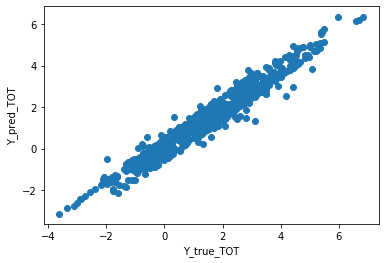

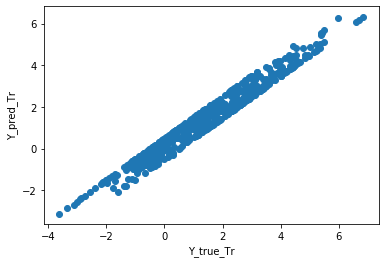

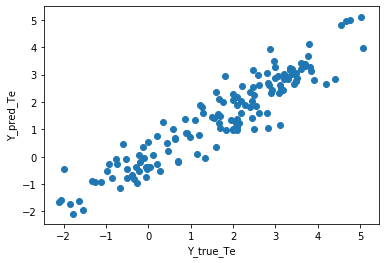

In [27]:
Modelli_SVM_clusters( X_M_SCALED_Tr_0, Y_M_0_TR, X_M_SCALED_Te_0, Y_M_0_TE, X_M_SCALED_TOT_0, Y_M_0 ) 

r2 su Tr set è : 0.9390736668589805
rmse su Tr set è : 0.3891006977820637
r2 su Te set è : 0.7347905440273383
rmse su Te set è : 0.7223335218244286
r2 su Tot set è : 0.9106810258942769
rmse su Tot set è : 0.46195080127304305
Errori sul set training : 0.35122258199692147 0.167457609292336 0.3886175125384685
Errori sul set test : 0.550461687036293 0.4677153491777241 0.7221892385395231
Errori sul set totale : 0.3799657961193757 0.26272521115449826 0.4613562652108276


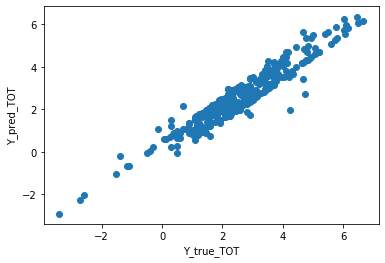

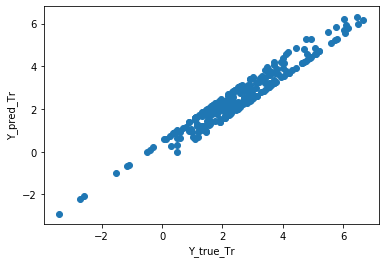

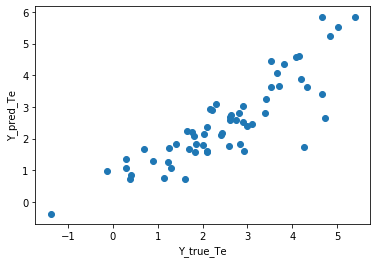

In [28]:
Modelli_SVM_clusters( X_M_SCALED_Tr_1, Y_M_1_TR, X_M_SCALED_Te_1, Y_M_1_TE, X_M_SCALED_TOT_1, Y_M_1 ) 

r2 su Tr set è : 0.928755938111485
rmse su Tr set è : 0.41844774357791975
r2 su Te set è : 0.22225557335800494
rmse su Te set è : 1.6521265131612692
r2 su Tot set è : 0.7979603048852445
rmse su Tot set è : 0.7332149016520847
Errori sul set training : 0.3868888384724238 0.15942252278430194 0.40919917139849193
Errori sul set test : 1.3492447394288316 0.9534467203855906 1.6279082081557124
Errori sul set totale : 0.5359645993175506 0.5003459206219767 0.7298077101566364


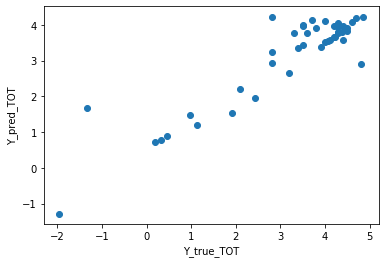

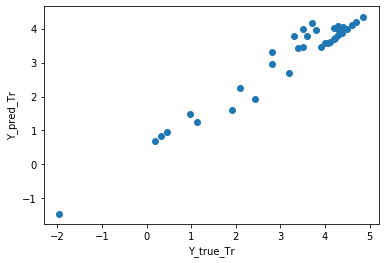

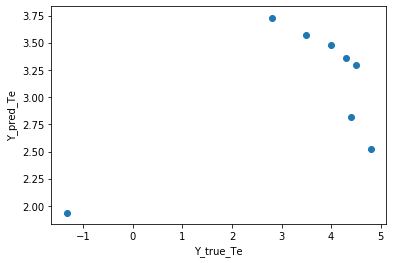

In [29]:
Modelli_SVM_clusters( X_M_SCALED_Tr_2, Y_M_2_TR, X_M_SCALED_Te_2, Y_M_2_TE, X_M_SCALED_TOT_2, Y_M_2 ) 